## Imports

In [1]:
import json
import os
import os.path as osp
import time

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from apxinfer.core.model import XIPModel
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score, recall_score
from willump.evaluation.willump_executor import willump_execute


## Task Specifics (Specific)

In [2]:
from apxinfer.examples.machinery.trainer import MachineryTrainer

working_dir = os.getcwd()
experiment_path = "experiment-results"
task_name = "machineryralf"
model_name = "mlp"
model_file = "mlp.pkl"
preparation_rescale = 10
assert working_dir == '/home/ckchang/Biathlon/willump-adaptation' # change to your own
os.chdir('..') # depending on your directory structure
working_dir = os.getcwd()

## Model Training Parameters

In [3]:

# model arguments
seed = 0
scaler_type = None
multi_class = False


## Loading Model, Data and Feature

In [4]:

# read in the model
original_model = joblib.load(osp.join(working_dir, experiment_path, task_name, "model", model_file))

# read the dataset
train_set = pd.read_csv(osp.join(working_dir, experiment_path, task_name, "dataset", "train_set.csv"))
test_set = pd.read_csv(osp.join(working_dir, experiment_path, task_name, "dataset", "test_set.csv"))
num_rows = len(test_set)


cols = list(train_set.columns)
fnames = [col for col in cols if col.startswith("f_")]
label_name = cols[-1]

def read_feature_info():
  # read in the feature info
  qcosts = json.load(open(osp.join(working_dir, experiment_path, task_name, "qcosts.json"), "r"))
  num_reqs = qcosts["nreqs"]
  group_costs = qcosts["qcosts"]
  return (num_reqs, group_costs)

num_reqs, group_costs = read_feature_info()
num_groups = len(group_costs)
num_reqs *= preparation_rescale

## Willump Registration Functions (Specific)

In [5]:

# training
def willump_train(y, X_list):
  X = np.concatenate(X_list, axis=1)
  # X = pd.concat(X_list, axis=1)
  trainer = MachineryTrainer(
    working_dir,
    original_model.model_type,
    model_name,
    seed,
    scaler_type,
    multi_class,
  )
  model = trainer.build_model(X, y)
  return model


def willump_predict(model, X_list):
  X = np.concatenate(X_list, axis=1)
  # X = pd.concat(X_list, axis=1)
  if X.shape[0] == 0:
    return np.zeros(0, dtype=np.int64)
  else:
    return model.predict(X)


def willump_confidence(model: XIPModel, X_list):
  X = np.concatenate(X_list, axis=1)
  # X = pd.concat(X_list, axis=1)
  return model.predict_proba(X)[:, 1]


def willump_score(true_y, pred_y):
  return roc_auc_score(true_y, pred_y)



### Generated Transformation Functions

In [6]:

def pseudo_transform_function0(input_x):
  time.sleep(group_costs[0] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-0")]].to_numpy()

def pseudo_transform_function1(input_x):
  time.sleep(group_costs[1] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-1")]].to_numpy()

def pseudo_transform_function2(input_x):
  time.sleep(group_costs[2] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-2")]].to_numpy()

def pseudo_transform_function3(input_x):
  time.sleep(group_costs[3] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-3")]].to_numpy()

def pseudo_transform_function4(input_x):
  time.sleep(group_costs[4] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-4")]].to_numpy()

def pseudo_transform_function5(input_x):
  time.sleep(group_costs[5] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-5")]].to_numpy()

def pseudo_transform_function6(input_x):
  time.sleep(group_costs[6] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-6")]].to_numpy()

def pseudo_transform_function7(input_x):
  time.sleep(group_costs[7] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-7")]].to_numpy()


cascades_dict = {}
@willump_execute(
  train_function=willump_train,
  predict_function=willump_predict,
  confidence_function=willump_confidence,
  score_function=willump_score,
  train_cascades_params=cascades_dict,
)
def willump_train_pipeline(input_x, input_y):
  feature0 = pseudo_transform_function0(input_x)
  feature1 = pseudo_transform_function1(input_x)
  feature2 = pseudo_transform_function2(input_x)
  feature3 = pseudo_transform_function3(input_x)
  feature4 = pseudo_transform_function4(input_x)
  feature5 = pseudo_transform_function5(input_x)
  feature6 = pseudo_transform_function6(input_x)
  feature7 = pseudo_transform_function7(input_x)
  return willump_train(input_y, [feature0, feature1, feature2, feature3, feature4, feature5, feature6, feature7])



## Training with Willump

In [7]:

willump_train_pipeline(train_set[fnames], train_set[label_name].to_numpy())
willump_model = willump_train_pipeline(train_set[fnames], train_set[label_name].to_numpy())
print("Cascades dict contents:", cascades_dict)


INFO:XIPTrainer:Building pipeline for classifier mlp


Iteration 1, loss = 0.50210544
Iteration 2, loss = 0.42320775
Iteration 3, loss = 0.39189552
Iteration 4, loss = 0.38971709
Iteration 5, loss = 0.37862790
Iteration 6, loss = 0.36986655
Iteration 7, loss = 0.36381950
Iteration 8, loss = 0.35816269
Iteration 9, loss = 0.35130503
Iteration 10, loss = 0.35057387
Iteration 11, loss = 0.34227133
Iteration 12, loss = 0.33714929
Iteration 13, loss = 0.33066495
Iteration 14, loss = 0.32616948
Iteration 15, loss = 0.32415732
Iteration 16, loss = 0.31613459
Iteration 17, loss = 0.30767332
Iteration 18, loss = 0.30273473
Iteration 19, loss = 0.29308588
Iteration 20, loss = 0.28661977
Iteration 21, loss = 0.28223507
Iteration 22, loss = 0.27340963
Iteration 23, loss = 0.26611293
Iteration 24, loss = 0.25980046
Iteration 25, loss = 0.25779352
Iteration 26, loss = 0.26000224
Iteration 27, loss = 0.24635600
Iteration 28, loss = 0.24807843
Iteration 29, loss = 0.23454927
Iteration 30, loss = 0.22522194
Iteration 31, loss = 0.22053481
Iteration 32, los

INFO:XIPTrainer:Building pipeline for classifier mlp


Iteration 1, loss = 0.54107976
Iteration 2, loss = 0.43944335
Iteration 3, loss = 0.42672953
Iteration 4, loss = 0.41932879
Iteration 5, loss = 0.41336994
Iteration 6, loss = 0.40669593
Iteration 7, loss = 0.40198096
Iteration 8, loss = 0.38989261
Iteration 9, loss = 0.38491136
Iteration 10, loss = 0.37683009
Iteration 11, loss = 0.37045883
Iteration 12, loss = 0.36621694
Iteration 13, loss = 0.36703196
Iteration 14, loss = 0.35955879
Iteration 15, loss = 0.35424234
Iteration 16, loss = 0.34697759
Iteration 17, loss = 0.34951099
Iteration 18, loss = 0.33664339
Iteration 19, loss = 0.33845150
Iteration 20, loss = 0.32579185
Iteration 21, loss = 0.32261153
Iteration 22, loss = 0.31432106
Iteration 23, loss = 0.31792812
Iteration 24, loss = 0.30538257
Iteration 25, loss = 0.30054544
Iteration 26, loss = 0.29535739
Iteration 27, loss = 0.29003173
Iteration 28, loss = 0.28650668
Iteration 29, loss = 0.28267092
Iteration 30, loss = 0.27562509
Iteration 31, loss = 0.27032731
Iteration 32, los

INFO:XIPTrainer:Building pipeline for classifier mlp


Iteration 111, loss = 0.15594866
Iteration 112, loss = 0.16326597
Iteration 113, loss = 0.17541094
Iteration 114, loss = 0.15907143
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Feature: feature4                  Cost: 31.082 Importance:  0.405
Feature: feature6                  Cost: 31.217 Importance:  0.047
Feature: feature5                  Cost: 31.355 Importance:  0.005
Feature: feature0                  Cost: 32.394 Importance:  0.003
Feature: feature1                  Cost: 31.527 Importance:  0.003
Feature: feature2                  Cost: 31.379 Importance:  0.000
Feature: feature3                  Cost: 31.361 Importance:  0.000
Feature: feature7                  Cost: 31.039 Importance:  0.000
Iteration 1, loss = 0.55131418
Iteration 2, loss = 0.43956836
Iteration 3, loss = 0.43417907
Iteration 4, loss = 0.42896939
Iteration 5, loss = 0.43122505
Iteration 6, loss = 0.42373865
Iteration 7, loss = 0.42446827
Iteration 8, loss = 0.421

INFO:XIPTrainer:Building pipeline for classifier mlp


Iteration 79, loss = 0.22775679
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Cutoff: 0.200000 Threshold: 0.800000 Expected Cost: 53.004217
Iteration 1, loss = 0.57770082
Iteration 2, loss = 0.42437887
Iteration 3, loss = 0.45225268
Iteration 4, loss = 0.42035904
Iteration 5, loss = 0.40769342
Iteration 6, loss = 0.40049211
Iteration 7, loss = 0.39134122
Iteration 8, loss = 0.38396591
Iteration 9, loss = 0.38161876
Iteration 10, loss = 0.37439681
Iteration 11, loss = 0.37337636
Iteration 12, loss = 0.36764152
Iteration 13, loss = 0.36962474
Iteration 14, loss = 0.36496346
Iteration 15, loss = 0.36399610
Iteration 16, loss = 0.36243559
Iteration 17, loss = 0.35743077
Iteration 18, loss = 0.35753371
Iteration 19, loss = 0.35618261
Iteration 20, loss = 0.35291573
Iteration 21, loss = 0.34589269
Iteration 22, loss = 0.34479051
Iteration 23, loss = 0.33896441
Iteration 24, loss = 0.32807644
Iteration 25, loss = 0.31912584
Iteration 26, loss = 0.30

INFO:XIPTrainer:Building pipeline for classifier mlp


Iteration 57, loss = 0.18009388
Iteration 58, loss = 0.18773943
Iteration 59, loss = 0.17630968
Iteration 60, loss = 0.18394757
Iteration 61, loss = 0.18192260
Iteration 62, loss = 0.17246739
Iteration 63, loss = 0.17880778
Iteration 64, loss = 0.16933304
Iteration 65, loss = 0.18899059
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Cutoff: 0.300000 Threshold: 0.800000 Expected Cost: 67.674215
Iteration 1, loss = 0.50702923
Iteration 2, loss = 0.43703263
Iteration 3, loss = 0.42148571
Iteration 4, loss = 0.41334942
Iteration 5, loss = 0.40528353
Iteration 6, loss = 0.39986490
Iteration 7, loss = 0.39294953
Iteration 8, loss = 0.38507236
Iteration 9, loss = 0.37700669
Iteration 10, loss = 0.37205598
Iteration 11, loss = 0.36782845
Iteration 12, loss = 0.36134457
Iteration 13, loss = 0.35817176
Iteration 14, loss = 0.35265367
Iteration 15, loss = 0.34736647
Iteration 16, loss = 0.34376683
Iteration 17, loss = 0.34483346
Iteration 18, loss = 0.32

INFO:XIPTrainer:Building pipeline for classifier mlp


Iteration 49, loss = 0.17178834
Iteration 50, loss = 0.17269596
Iteration 51, loss = 0.17502774
Iteration 52, loss = 0.17726597
Iteration 53, loss = 0.17347859
Iteration 54, loss = 0.16762914
Iteration 55, loss = 0.17009226
Iteration 56, loss = 0.17537305
Iteration 57, loss = 0.17367328
Iteration 58, loss = 0.17038898
Iteration 59, loss = 0.18356436
Iteration 60, loss = 0.16812829
Iteration 61, loss = 0.18173387
Iteration 62, loss = 0.17730361
Iteration 63, loss = 0.18415282
Iteration 64, loss = 0.17860636
Iteration 65, loss = 0.18315112
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Cutoff: 0.400000 Threshold: 0.800000 Expected Cost: 101.126885
Iteration 1, loss = 0.65638597
Iteration 2, loss = 0.44017281
Iteration 3, loss = 0.46289101
Iteration 4, loss = 0.42145366
Iteration 5, loss = 0.42058501
Iteration 6, loss = 0.40659637
Iteration 7, loss = 0.40524849
Iteration 8, loss = 0.39603001
Iteration 9, loss = 0.39007828
Iteration 10, loss = 0.3

INFO:XIPTrainer:Building pipeline for classifier mlp


Iteration 41, loss = 0.37135275
Iteration 42, loss = 0.37177543
Iteration 43, loss = 0.37277307
Iteration 44, loss = 0.37270170
Iteration 45, loss = 0.36963178
Iteration 46, loss = 0.37084834
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Cutoff: 0.500000 Threshold: 1.000000 Expected Cost: 251.352328
Iteration 1, loss = 0.50210544
Iteration 2, loss = 0.42320775
Iteration 3, loss = 0.39189552
Iteration 4, loss = 0.38971709
Iteration 5, loss = 0.37862790
Iteration 6, loss = 0.36986655
Iteration 7, loss = 0.36381950
Iteration 8, loss = 0.35816269
Iteration 9, loss = 0.35130503
Iteration 10, loss = 0.35057387
Iteration 11, loss = 0.34227133
Iteration 12, loss = 0.33714929
Iteration 13, loss = 0.33066495
Iteration 14, loss = 0.32616948
Iteration 15, loss = 0.32415732
Iteration 16, loss = 0.31613459
Iteration 17, loss = 0.30767332
Iteration 18, loss = 0.30273473
Iteration 19, loss = 0.29308588
Iteration 20, loss = 0.28661977
Iteration 21, loss = 0.2

INFO:XIPTrainer:Building pipeline for classifier mlp


Iteration 57, loss = 0.14550289
Iteration 58, loss = 0.15084913
Iteration 59, loss = 0.15337396
Iteration 60, loss = 0.15229426
Iteration 61, loss = 0.14768694
Iteration 62, loss = 0.14863456
Iteration 63, loss = 0.14829150
Iteration 64, loss = 0.14974739
Iteration 65, loss = 0.15478385
Iteration 66, loss = 0.15431458
Iteration 67, loss = 0.14645988
Iteration 68, loss = 0.14554648
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50958854
Iteration 2, loss = 0.40795303
Iteration 3, loss = 0.40583293
Iteration 4, loss = 0.40826440
Iteration 5, loss = 0.39989901
Iteration 6, loss = 0.40117961
Iteration 7, loss = 0.39729739
Iteration 8, loss = 0.39627736
Iteration 9, loss = 0.39047458
Iteration 10, loss = 0.38475543
Iteration 11, loss = 0.37869317
Iteration 12, loss = 0.37411137
Iteration 13, loss = 0.36420591
Iteration 14, loss = 0.35633839
Iteration 15, loss = 0.34702917
Iteration 16, loss = 0.33442672
Iteration 17, loss = 0.

## Evaluation

In [8]:

result_dict = {"baseline": {}, "willump": {}, "preparation_rescale": preparation_rescale}

### Baseline (Specific)

In [9]:

## baseline
def willump_eval_pipeline(input_x, model):
  feature0 = pseudo_transform_function0(input_x)
  feature1 = pseudo_transform_function1(input_x)
  feature2 = pseudo_transform_function2(input_x)
  feature3 = pseudo_transform_function3(input_x)
  feature4 = pseudo_transform_function4(input_x)
  feature5 = pseudo_transform_function5(input_x)
  feature6 = pseudo_transform_function6(input_x)
  feature7 = pseudo_transform_function7(input_x)
  return willump_predict(model, [feature0, feature1, feature2, feature3, feature4, feature5, feature6, feature7])

unopt_time_elapsed_total = 0
result_dict["baseline"]["latency"] = []
baseline_preds = np.zeros(num_rows)

for i in range(num_rows):
  entry = test_set.iloc[i:i+1]
  time_start = time.time()
  preds = willump_eval_pipeline(entry, willump_model)
  time_elapsed = time.time() - time_start
  result_dict["baseline"]["latency"].append(time_elapsed)
  baseline_preds[i] = preds[0]
  unopt_time_elapsed_total += time_elapsed
baseline_throughput = num_rows / unopt_time_elapsed_total
baseline_accuracy = accuracy_score(test_set[label_name], baseline_preds)
baseline_precision = precision_score(test_set[label_name], baseline_preds)
baseline_recall = recall_score(test_set[label_name], baseline_preds)
baseline_f1 = f1_score(test_set[label_name], baseline_preds)
baseline_roc = roc_auc_score(test_set[label_name], baseline_preds)


print("Elapsed Time %fs" % unopt_time_elapsed_total)
print("Throughput: %f" % baseline_throughput)
print("Accuracy: %f" % baseline_accuracy)

result_dict["baseline"]["throughput"] = baseline_throughput
result_dict["baseline"]["accuracy"] = baseline_accuracy
result_dict["baseline"]["precision"] = baseline_precision
result_dict["baseline"]["recall"] = baseline_recall
result_dict["baseline"]["f1"] = baseline_f1
result_dict["baseline"]["roc"] = baseline_roc


Elapsed Time 102.698036s
Throughput: 3.291202
Accuracy: 0.934911


### Willump (Specific)

In [10]:

## Willump cascade
@willump_execute(
  predict_function=willump_predict,
  confidence_function=willump_confidence,
  predict_cascades_params=cascades_dict,
)
def willump_eval_pipeline_cascades(input_x, model):
  feature0 = pseudo_transform_function0(input_x)
  feature1 = pseudo_transform_function1(input_x)
  feature2 = pseudo_transform_function2(input_x)
  feature3 = pseudo_transform_function3(input_x)
  feature4 = pseudo_transform_function4(input_x)
  feature5 = pseudo_transform_function5(input_x)
  feature6 = pseudo_transform_function6(input_x)
  feature7 = pseudo_transform_function7(input_x)
  return willump_predict(model, [feature0, feature1, feature2, feature3, feature4, feature5, feature6, feature7])

# willump_eval_pipeline_cascades(test_set[:100], willump_model) # Warm-up?
# willump_eval_pipeline_cascades(test_set[:100], willump_model)

cascades_time_elapsed_total = 0
result_dict["willump"]["latency"] = []
result_dict["willump"]["approx_conf"] = []
approximate_model = cascades_dict["approximate_model"]
selected_feature_indices = cascades_dict["selected_feature_indices"]
willump_preds = np.zeros(num_rows)

for i in range(num_rows):
  entry = test_set.iloc[i:i+1]
  time_start = time.time()
  preds = willump_eval_pipeline_cascades(entry, willump_model)
  time_elapsed = time.time() - time_start
  result_dict["willump"]["latency"].append(time_elapsed)
  willump_preds[i] = preds[0]

  transform_template = 'pseudo_transform_function{}(entry)'
  feats = [eval(transform_template.format(i)) for i in selected_feature_indices]
  transformed_entry = np.hstack(feats)
  approx_conf = approximate_model.predict_proba(transformed_entry)
  result_dict["willump"]["approx_conf"].append(float(approx_conf[0, 1]))
  cascades_time_elapsed_total += time_elapsed
willump_throughput = num_rows / cascades_time_elapsed_total
willump_accuracy = accuracy_score(test_set[label_name], willump_preds)
willump_precision = precision_score(test_set[label_name], willump_preds)
willump_recall = recall_score(test_set[label_name], willump_preds)
willump_f1 = f1_score(test_set[label_name], willump_preds)
willump_roc = roc_auc_score(test_set[label_name], willump_preds)
relative_accuracy = accuracy_score(baseline_preds, willump_preds)
relative_precision = precision_score(baseline_preds, willump_preds)
relative_recall = recall_score(baseline_preds, willump_preds)
relative_f1 = f1_score(baseline_preds, willump_preds)
relative_roc = roc_auc_score(baseline_preds, willump_preds)

print("Elapsed Time %fs" % cascades_time_elapsed_total)
print("Throughput: %f" % willump_throughput)
print("Accuracy: %f" % willump_accuracy)

result_dict["willump"]["throughput"] = willump_throughput
result_dict["willump"]["accuracy"] = willump_accuracy
result_dict["willump"]["precision"] = willump_precision
result_dict["willump"]["recall"] = willump_recall
result_dict["willump"]["f1"] = willump_f1
result_dict["willump"]["roc"] = willump_roc
result_dict["willump"]["relative_accuracy"] = relative_accuracy
result_dict["willump"]["relative_precision"] = relative_precision
result_dict["willump"]["relative_recall"] = relative_recall
result_dict["willump"]["relative_f1"] = relative_f1
result_dict["willump"]["relative_roc"] = relative_roc
result_dict["willump"]["cascades"] = {}
result_dict["willump"]["cascades"]["selected_feature_indices"] = cascades_dict["selected_feature_indices"]
result_dict["willump"]["cascades"]["cascade_threshold"] = cascades_dict["cascade_threshold"]


Elapsed Time 25.077250s
Throughput: 13.478352
Accuracy: 0.917160


### Saving Result

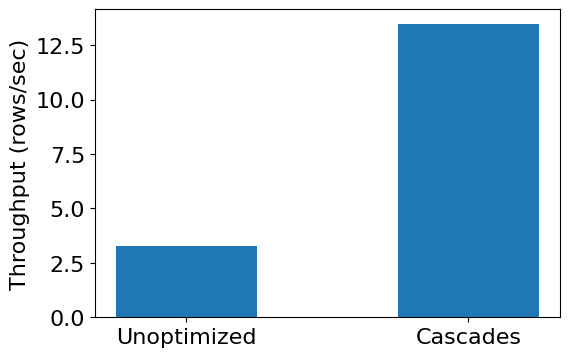

In [11]:
with open(osp.join(working_dir, "willump-adaptation", "result", f"{task_name}_{model_name}.json"), "w") as f:
  json_string = json.dumps(result_dict, indent=4)
  f.write(json_string)


plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
fig, axes = plt.subplots(figsize=(6, 4), ncols=1, nrows=1,
                         sharex=False, sharey=False)
x = np.arange(2)
width = 0.5  # the width of the bars

bars = axes.bar(x, [num_rows / unopt_time_elapsed_total, num_rows / cascades_time_elapsed_total], width)
axes.set(xlabel='', ylabel='Throughput (rows/sec)')
axes.set_xticks(x)
axes.set_xticklabels(["Unoptimized", "Cascades"])
plt.savefig(osp.join(working_dir, "willump-adaptation", "result", f"{task_name}_{model_name}.jpg"))
